In [10]:
# read results_cora.csv

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# read data
df = pd.read_csv('results_cora.csv')
# remove column 'Unnamed: 0'
df = df.drop('Unnamed: 0', axis=1)
print(df.head())


   Accuracy  Precision    Recall  F1_Score  Alpha  Epsilon  Attention
0     0.564   0.558943  0.585158  0.544781    0.5      0.5          1
1     0.488   0.485024  0.528081  0.483300    0.5      0.5          0
2     0.573   0.553318  0.595755  0.552420    0.5      0.6          1
3     0.483   0.481928  0.524691  0.479511    0.5      0.6          0
4     0.598   0.566338  0.598647  0.572537    0.5      0.7          1


In [35]:
# metrics to show
# groupby 'Attention'
# mean and std for each group

# groupby 'Attention'
grouped = df.groupby('Attention')

# mean and std for each group
mean = grouped.mean()
std = grouped.std()

print(mean)
print(std)

# export to csv
mean.to_csv('mean_cr.csv')
std.to_csv('std_cr.csv')

           Accuracy  Precision    Recall  F1_Score  Alpha  Epsilon
Attention                                                         
0           0.48372   0.481356  0.523522  0.479421    0.7      0.7
1           0.57908   0.557031  0.595663  0.558384    0.7      0.7
           Accuracy  Precision    Recall  F1_Score     Alpha   Epsilon
Attention                                                             
0          0.002407   0.002845  0.003396  0.002649  0.144338  0.144338
1          0.006544   0.004226  0.004804  0.005880  0.144338  0.144338


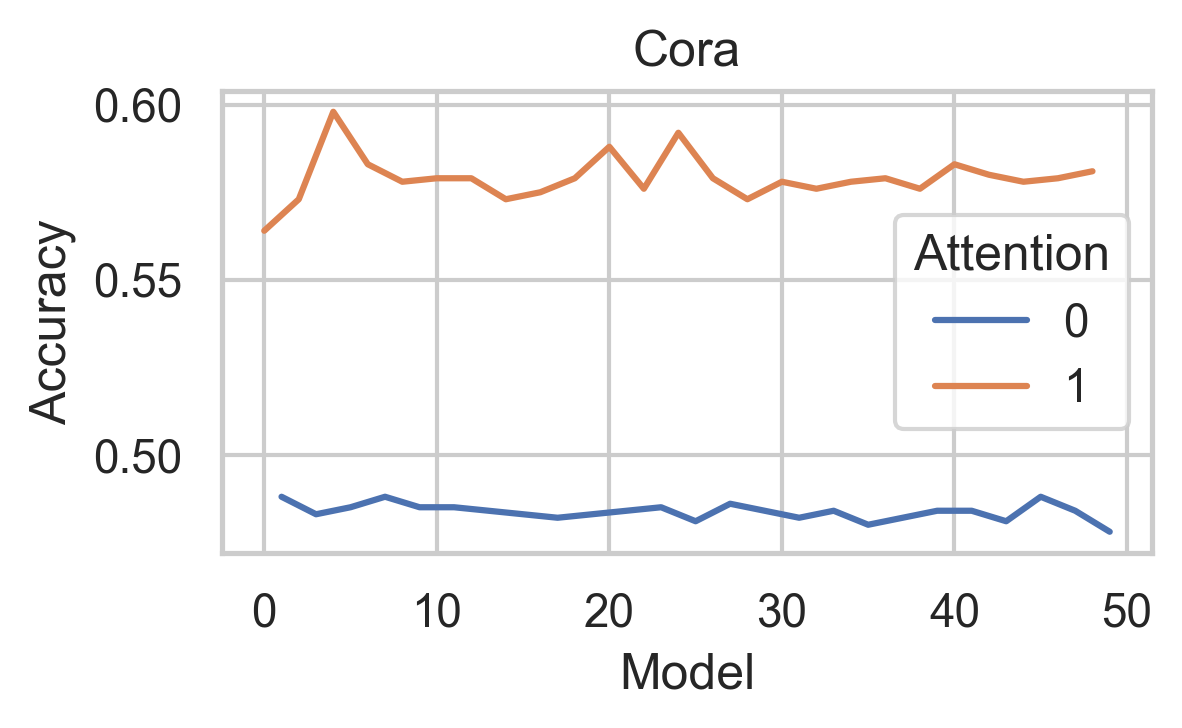

In [37]:
# plot accuracy with hue  = attention
sns.set(style="whitegrid")
plt.figure(figsize=(4, 2), dpi=300)  # Set the figure size to 10x6
ax = sns.lineplot(x=range(0,len(df)), y="Accuracy", data=df, hue="Attention")
plt.title('Cora')
plt.xlabel('Model')
plt.show()


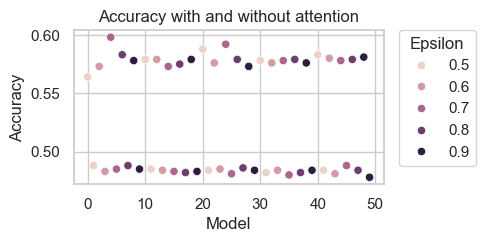

In [28]:
plt.figure(figsize=(4, 2))
ax = sns.scatterplot(x=range(0,len(df)), y="Accuracy", data=df, hue="Epsilon")
plt.title('Accuracy with and without attention')
plt.xlabel('Model')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., title='Epsilon')
plt.show()

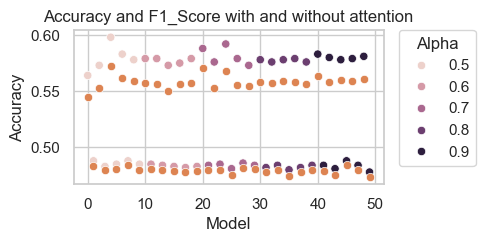

In [32]:
plt.figure(figsize=(4, 2))
ax = sns.scatterplot(x=range(0,len(df)), y="Accuracy", data=df, hue="Alpha")
sns.scatterplot(x=range(0,len(df)), y="F1_Score", data=df)
plt.title('Accuracy and F1_Score with and without attention')
plt.xlabel('Model')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., title='Alpha')
plt.show()
#plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., title='Epsilon')
plt.show()

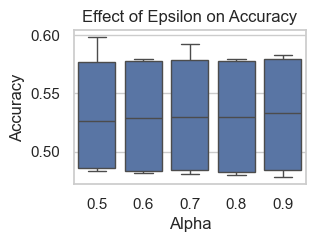

In [41]:
# groupby epsilon and plot boxplot for accuracy
plt.figure(figsize=(3, 2))
ax = sns.boxplot(x="Alpha", y="Accuracy", data=df)
plt.title('Effect of Epsilon on Accuracy')

plt.show()

In [42]:
df2 = pd.read_csv('results_cs.csv')
# remove column 'Unnamed: 0'
df2 = df2.drop('Unnamed: 0', axis=1)

# combine the two dataframes in df1 add a column 'Dataset' with value 'Cora' and in df2 add a column 'Dataset' with value 'Citeseer'
df['Dataset'] = 'Cora'
df2['Dataset'] = 'Citeseer'
df = pd.concat([df, df2], axis=0)

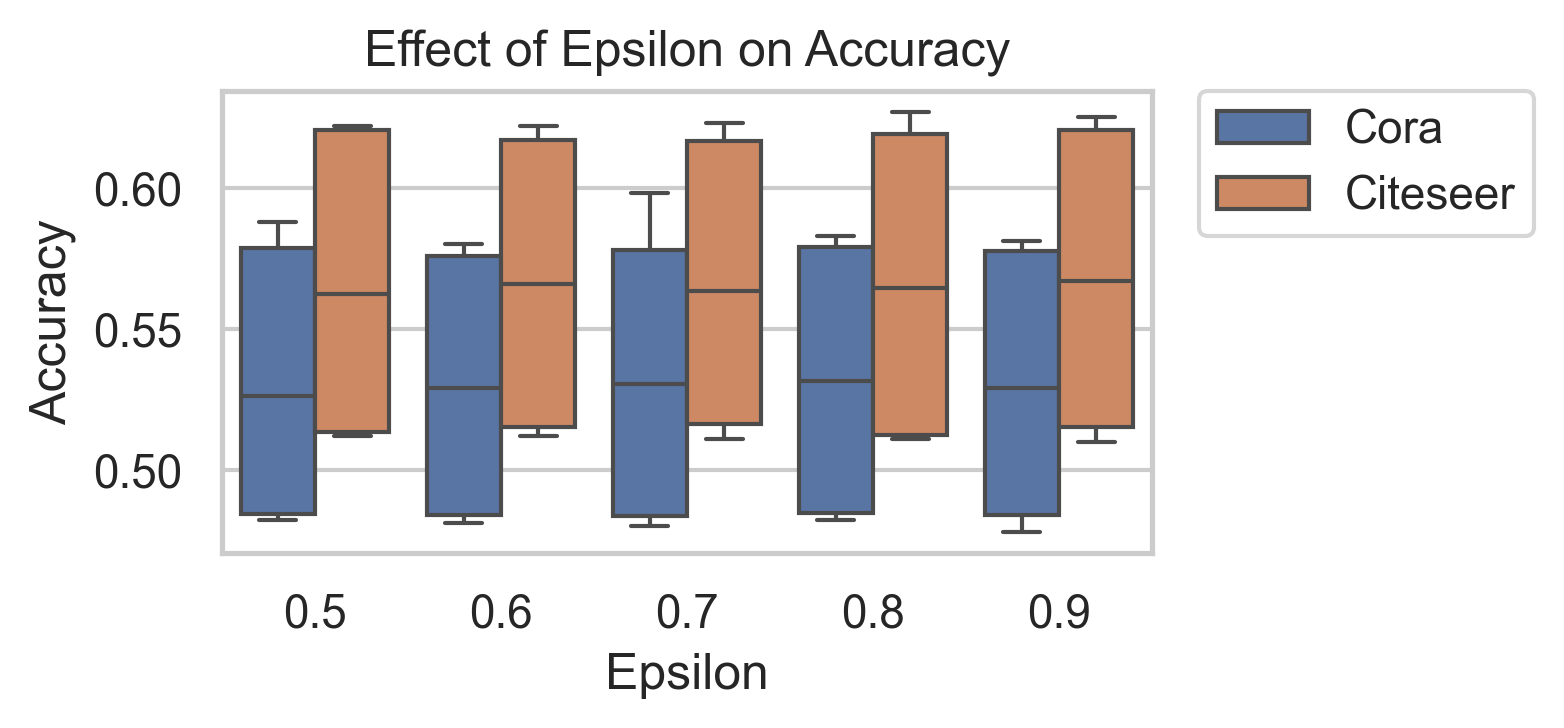

In [55]:
plt.figure(figsize=(4, 2), dpi=300)
ax = sns.boxplot(x="Epsilon", y="Accuracy", data=df, hue='Dataset')
plt.title('Effect of Epsilon on Accuracy')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.show()